In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
data = pd.read_csv('./data_procesar_diego.csv')

# inferimos la presencia si la asistencia es diferente de 0
data['presencia'] = np.where(data['asistencia'] > 0, 1, 0)

# Inferimos el dia, 0 para lunes, 1 para martes...
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html
data['dia'] = pd.to_datetime(data['date']).dt.dayofweek

print(data.columns)

# Seleccion de etiquetas y la banderita de presencia
# Aca dropeamos todo lo que no nos interesa ya, nos quedamos c on el clima nomas
# Tendremos que dropear min_co2, max_co2, median_co2, q1_co2, q3_co2, stdev_co2, count_co2
X = data.drop(columns=['date', 'fecha_marcacion', 'asistencia', 'presencia', 'min_co2',
                       'max_co2', 'median_co2', 'q1_co2', 'q3_co2', 'stdev_co2', 'count_co2'
                       ])
# Salvamos drop para chequear despues
X.to_csv('./drop.csv', index=False)

y = data['presencia']

# Normalizado segun el video
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Denuevo, division de datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Definicion del modelo

model = Sequential([
    # Dense 64 significa que hay 64 neuronas en la capa, activacion relu
    # https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compiladcion de moodelo
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
# Entrenamiento de modelo, tunear epochs
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

2024-06-13 16:26:08.634022: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 16:26:08.685851: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 16:26:08.904910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 16:26:10.410805: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Index(['date', 'min_co2', 'max_co2', 'median_co2', 'q1_co2', 'q3_co2',
       'stdev_co2', 'count_co2', 'min_pm25', 'max_pm25', 'median_pm25',
       'q1_pm25', 'q3_pm25', 'stdev_pm25', 'count_pm25', 'min', 'max',
       'median', 'q1', 'q3', 'stdev', 'count', 'min_temp', 'max_temp',
       'median_temp', 'q1_temp', 'q3_temp', 'stdev_temp', 'count_temp',
       'fecha_marcacion', 'asistencia', 'presencia', 'dia'],
      dtype='object')
Epoch 1/100


/home/link/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5651 - loss: 0.6900 - val_accuracy: 0.6863 - val_loss: 0.6242
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8066 - loss: 0.5997 - val_accuracy: 0.6863 - val_loss: 0.6123
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7871 - loss: 0.5292 - val_accuracy: 0.6863 - val_loss: 0.6028
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.5504 - val_accuracy: 0.6863 - val_loss: 0.5946
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7800 - loss: 0.4820 - val_accuracy: 0.6863 - val_loss: 0.5912
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7823 - loss: 0.4926 - val_accuracy: 0.6863 - val_loss: 0.5807
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7364 - loss: 0.4898 - val_accuracy: 0.6863 - val_loss: 0.5719
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7864 - loss: 0.4444 - val_accuracy: 0.6863 - val_loss: 0.5568
Epoch 9/100

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7708 - loss: 0.7632 
Loss: 0.7362982034683228, Accuracy: 0.78125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Primeras 10 predicciones: [0 1 1 1 1 0 1 0 1 0]
Valores reales: [1 1 0 0 1 1 1 0 1 0]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.47      0.53        17
           1       0.82      0.89      0.86        47

    accuracy                           0.78        64
   macro avg       0.72      0.68      0.70        64
weighted avg       0.77      0.78      0.77        64



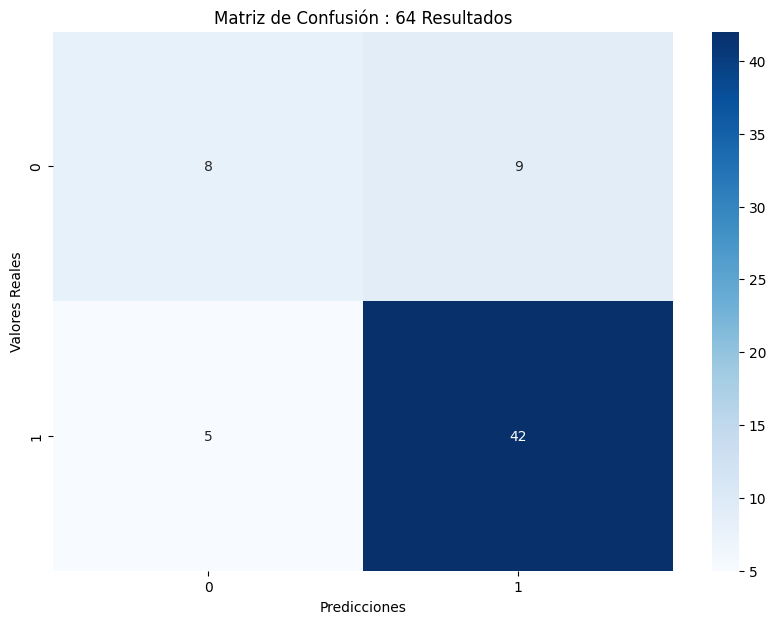

In [2]:
# Evaluacion del modelo
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Hacer predicciones
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
# Mostrar resultados
# print(predicted_classes)
# Mostrat total aciertos

print("Primeras 10 predicciones:", predicted_classes[:10].flatten())
print("Valores reales:", y_test[:10].values)

# Evaluar las predicciones
print("Reporte de clasificación:\n",
      classification_report(y_test, predicted_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
sizeTest = len(predicted_classes)
plt.title('Matriz de Confusión : ' + str(sizeTest) + " Resultados")
plt.show()

Analisis de la matriz de confusion
https://www.youtube.com/watch?v=jUHbKZSD-Iw
Como podemos evaluar, la matriz de confusion nos indica que tenemos una buena calidad en el modelo, no muy exacto
Tenemos 44 verdaderos positivos, 10 verdaderos negativos, donde erro 3 veces pensando que vendria y 7 pensando que no vendria.


In [12]:
# Con valores arbitrarios
import pandas as pd
import numpy as np

nuevos_datos = pd.DataFrame({
    # 'min_co2': [400, 420],
    # 'max_co2': [420, 430],
    # 'median_co2': [410, 425],
    # 'q1_co2': [405, 422],
    # 'q3_co2': [415, 428],
    # 'stdev_co2': [5, 3],
    # 'count_co2': [100, 120],
    # Particulas
    'min_pm25': [10, 12],
    'max_pm25': [20, 22],
    'median_pm25': [15, 17],
    'q1_pm25': [12, 14],
    'q3_pm25': [18, 19],
    'stdev_pm25': [2, 2.5],
    'count_pm25': [5000, 60],
    # Humedad, si la minima es muy alto decx no viene ni cagando
    'min': [50, 52],
    'max': [60, 62],
    'median': [55, 57],
    'q1': [53, 55],
    'q3': [57, 59],
    'stdev': [2, 1.5],
    'count': [10, 11],
    # Temperatura
    'min_temp': [10, 12],
    'max_temp': [30, 40],
    'median_temp': [15, 17],
    'q1_temp': [12, 14],
    'q3_temp': [18, 19],
    'stdev_temp': [2, 2.5],
    'count_temp': [50, 60],
    # Domingos nunca viene
    'dia': [0, 6]  # Lunes y Domingo
})
# Normalizacion
nuevos_datos_scaled = scaler.transform(nuevos_datos)
# Hacer predicciones con los nuevos datos
nuevas_predicciones = model.predict(nuevos_datos_scaled)
nuevas_predicciones_clases = (nuevas_predicciones > 0.5).astype(int)

# Mostrar resultados
resultados = pd.DataFrame({
    'Datos Originales': nuevos_datos.values.tolist(),
    'Predicción': nuevas_predicciones.flatten(),
    'Presencia': nuevas_predicciones_clases.flatten(),
    'Probabilidad de asistencia %': nuevas_predicciones.flatten() * 100
})
print(resultados)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
                                    Datos Originales    Predicción  Presencia  \
0  [10.0, 20.0, 15.0, 12.0, 18.0, 2.0, 5000.0, 50...  9.999984e-01          1   
1  [12.0, 22.0, 17.0, 14.0, 19.0, 2.5, 60.0, 52.0...  3.592384e-08          0   

   Probabilidad de asistencia %  
0                     99.999840  
1                      0.000004  
